<a href="https://colab.research.google.com/github/bobbyinfj/projects/blob/master/keras_book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial code for Keras Book Recommendation:
https://towardsdatascience.com/building-a-book-recommendation-system-using-keras-1fba34180699


In [0]:
import tensorflow as tf

from google.colab import files

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

from keras.models import load_model

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
#upload data
try:
  uploaded
except: 
  uploaded = files.upload()

In [0]:
#load dataset
dataset = pd.read_csv('ratings.csv')
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())

#Dot Product Model

In [0]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Book-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Book-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      User-Input[0][0]                 
____________________________________________________________________________________________

Epoch 1/5
785404/785404 [==============================] - 98s 124us/step - loss: 13.5385
Epoch 2/5
785404/785404 [==============================] - 97s 124us/step - loss: 4.1235
Epoch 3/5
785404/785404 [==============================] - 98s 125us/step - loss: 1.6901
Epoch 4/5
785404/785404 [==============================] - 101s 128us/step - loss: 1.1589
Epoch 5/5
785404/785404 [==============================] - 97s 123us/step - loss: 0.9438


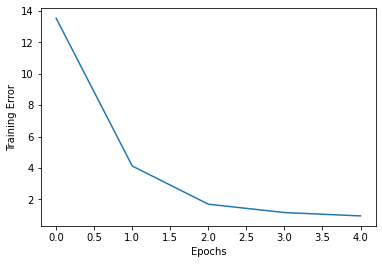

In [16]:
if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [18]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 3s 14us/step


1.1417699811598856

In [19]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[4.9045424] 5
[3.828821] 4
[3.5101783] 3
[4.204725] 5
[3.5005112] 3
[4.195318] 3
[4.235585] 3
[5.050901] 4
[4.3851013] 3
[4.100931] 5


[None, None, None, None, None, None, None, None, None, None]

#Creating Neural Network

In [0]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
785404/785404 [==============================] - 105s 133us/step - loss: 0.7993
Epoch 2/5
785404/785404 [==============================] - 105s 134us/step - loss: 0.6877
Epoch 3/5
785404/785404 [==============================] - 102s 129us/step - loss: 0.6591
Epoch 4/5
785404/785404 [==============================] - 103s 131us/step - loss: 0.6365
Epoch 5/5
785404/785404 [==============================] - 103s 131us/step - loss: 0.6168


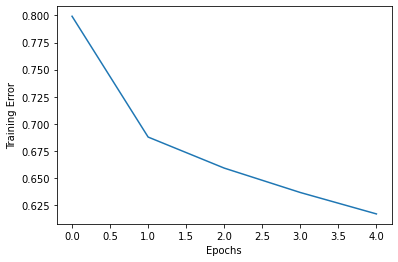

In [22]:
if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [23]:
model2.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 3s 17us/step


0.7096356944323091

In [24]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.1676164] 5
[3.61233] 4
[3.580942] 3
[4.275221] 5
[3.368354] 3
[3.774848] 3
[3.7996912] 3
[4.834987] 4
[4.203724] 3
[4.1561213] 5


[None, None, None, None, None, None, None, None, None, None]

#Visualize Embeddings

In [0]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [26]:
book_em_weights[:5]

array([[ 0.01074924, -0.00717117,  0.00466169,  0.01680905,  0.00719576],
       [ 0.7259618 , -1.3118287 ,  1.2067734 ,  1.2604618 ,  0.98908323],
       [ 1.1393844 , -1.2926216 ,  1.3085794 ,  1.1161587 ,  0.9618561 ],
       [ 0.63802177, -0.9816158 ,  0.42164063,  0.99183095,  0.91293174],
       [ 1.1736258 , -1.3630462 ,  1.2260299 ,  1.1617533 ,  0.72763866]],
      dtype=float32)

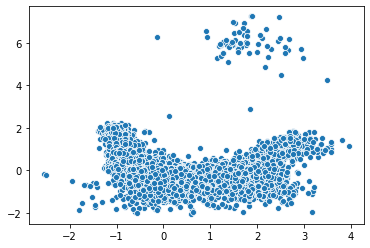

In [27]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [29]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

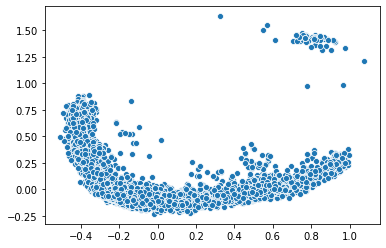

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

what does the above graph represent about the embeddings?

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.008s...
[t-SNE] Computed neighbors for 10001 samples in 0.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.027332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.534073
[t-SNE] KL

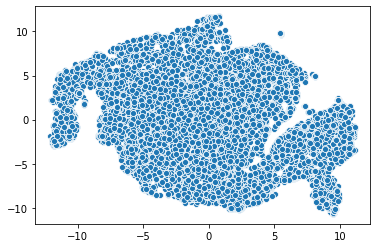

In [32]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

#Making Recommendations

In [33]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [34]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [35]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8803, 9089, 7062, 7638, 7843])

In [36]:
# print predicted scores
predictions[recommended_book_ids]

array([3.6108873, 3.546503 , 3.3411844, 3.275734 , 3.2653468],
      dtype=float32)

In [40]:
try:
  books
except:
  files.upload()

Saving books.csv to books.csv


In [41]:
books = pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [42]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7061,7062,12743472,12743472,17882885,27,1408319462,9.781408e+12,Teri Terry,2012.0,Slated,"Slated (Slated, #1)",eng,4.07,17404,19805,2404,272,868,3661,7489,7515,https://images.gr-assets.com/books/1453582609m...,https://images.gr-assets.com/books/1453582609s...
7637,7638,12009,12009,2465248,28,1597800449,9.781598e+12,Iain M. Banks,2004.0,The Algebraist,The Algebraist,eng,3.99,13210,14793,606,185,684,3067,5984,4873,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7842,7843,17182421,17182421,21762912,49,778315339,9.780778e+12,Jason Mott,2013.0,The Returned,The Returned,eng,3.29,11449,13269,2452,581,2122,5100,3798,1668,https://images.gr-assets.com/books/1372089735m...,https://images.gr-assets.com/books/1372089735s...
8802,8803,12598982,12598982,14096818,46,307716546,9.780308e+12,Rosamund Lupton,2011.0,Afterwards,Afterwards,NaN,3.79,11041,14146,1747,359,975,3563,5634,3615,https://images.gr-assets.com/books/1330957613m...,https://images.gr-assets.com/books/1330957613s...
9088,9089,17181905,17181905,23628709,4,NaN,NaN,H.M. Ward,2013.0,NaN,The Arrangement: The Ferro Family (The Arrange...,eng,4.02,16348,16397,933,413,792,3023,5933,6236,https://images.gr-assets.com/books/1356483152m...,https://images.gr-assets.com/books/1356483152s...
